In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.interpolate import CubicHermiteSpline

# Laboratorio 04: Interpolación.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Dana Ines Romero Bustos
*Métodos computacionales 2025-I*

---

# 1.

Un automóvil que viaja a lo largo de una carretera recta es cronometrado en varios puntos. Los datos de las observaciones se dan en la siguiente tabla, donde el tiempo está en segundos, la distancia en metros y la velocidad en metros por segundo.

```
tiempos = np.array([0, 3, 5, 8, 13]) # segundos
distancias = np.array([0, 225, 383, 623, 993]) # metros
velocidades = np.array([75, 77, 80, 74, 72]) # metros/segundo
```

- Usar un polinomio de Hermite y de Splines Cúbicos para predecir la posición del automóvil y su velocidad cuando $t=10$ s.
- ¿Cuál es la velocidad máxima predicha para el automóvil en cada caso?

In [5]:
# Datos
tiempos = np.array([0, 3, 5, 8, 13]) # segundos
distancias = np.array([0, 225, 383, 623, 993]) # metros
velocidades = np.array([75, 77, 80, 74, 72]) # metros/segundo

# Polinomio de Hermite
pol_hermite = CubicHermiteSpline(tiempos , distancias , velocidades)

# Splines Cúbicos
interp_Spline = CubicSpline(tiempos, distancias, bc_type= 'natural')

# Prediccion de la posición y velocidad cuando t = 10 s

pos_hermite_10 = pol_hermite(10) # Predicciones usando hermite
vel_hermite_10 = pol_hermite.derivative()(10)

pos_spline_10 = interp_Spline(10) # Predicciones usando Cubic Spline
vel_spline_10 = interp_Spline.derivative()(10)

# Interpolar
t_interp = np.linspace(min(tiempos), max(tiempos), 500)

# Velocidades
vel_hermite = pol_hermite.derivative()(t_interp)
vel_spline = interp_Spline.derivative()(t_interp)

# Velocidad máxima predicha
vmax_hermite = max(vel_hermite)
vmax_spline = max(vel_spline)

print(f'Polinomio de Hermite: \n\n Velocidad máxima = {vmax_hermite:.2f} m/s \n Cuando t = 10s \n Posición = {pos_hermite_10:.2f} m \n Velocidad = {vel_hermite_10:.2f} m/s \n')
print(f'Cubic Spline: \n\n Velocidad máxima = {vmax_spline:.2f} m/s \n Cuando t = 10s \n Posición = {pos_spline_10:.2f} m \n Velocidad = {vel_spline_10:.2f} m/s')

Polinomio de Hermite: 

 Velocidad máxima = 82.00 m/s 
 Cuando t = 10s 
 Posición = 771.96 m 
 Velocidad = 74.64 m/s 

Cubic Spline: 

 Velocidad máxima = 80.68 m/s 
 Cuando t = 10s 
 Posición = 774.86 m 
 Velocidad = 74.16 m/s


# 2.
Los valores de la aceleración gravitacional $g$ dependen de la altitud $y$ según se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar el valor de la aceleración gravitacional a las altitudes de 5,000 m, 42,000 m y 90,000 m. Grafique la distribución de la función de interpolación obtenida junto con los datos dados.

```
y = [0, 20000, 40000, 60000, 80000]  # en metros
g = [9.8100, 9.7487, 9.6879, 9.6278, 9.5682]  # en m/s²
```

In [6]:
# Preparando el metodo de diferencias divididas:

def diferencias_divididas(x , y , j , i=0):
    '''
    i, j: Nos van a dar la diferencia dividida
    '''

    if i == j:
        return y[i]
    else:
        num = diferencias_divididas(x , y , j , i = i + 1) - diferencias_divididas(x , y , j-1 , i = i)
        den = x[j] - x[i]
        return num/den

def coeficientes(x, y):

    coef = np.zeros_like(x, dtype = float)

    for j in range(len(x)):
        coef[j] = diferencias_divididas(x , y , j)
    return coef

def polinomio_newton(x , y , x_inter):

    a = coeficientes(x , y) # Coeficiente a_i
    P = a[0]                 # Inciciamos el polinomio
    producto = 1             # Iniciamos la productoria

    for i in range(1 , len(x)):

        producto *= (x_inter - x[i-1]) # Sacamos los productos
        P += a[i] * producto         # Actualizamos el polinomio

    return P

g(5000 m) = 9.7947 m/s²
g(42000 m) = 9.6819 m/s²
g(90000 m) = 9.5384 m/s²


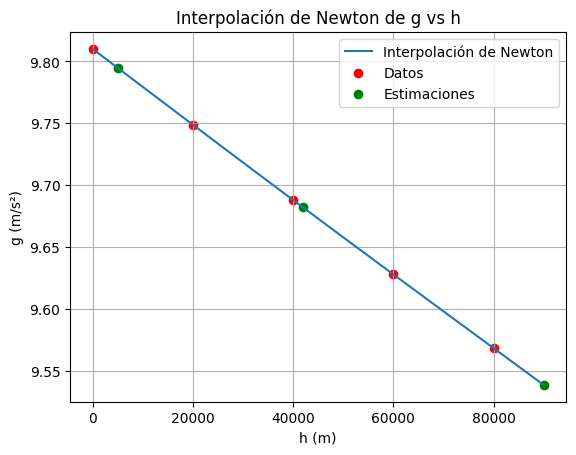

In [7]:
# Datos
y = [0, 20000, 40000, 60000, 80000]  # en metros
g = [9.8100, 9.7487, 9.6879, 9.6278, 9.5682]  # en m/s²

# Interpolar
y_interp = np.linspace(min(y) , 90000 , 100)
g_interp = polinomio_newton(y , g , y_interp)

# Alturas dadas para estimar la gravedad
alturas = [5000, 42000, 90000]

# Evaluar con el polinomio de Newton
for h in alturas:
    g_aprox = polinomio_newton(y, g, h)
    print(f'g({h} m) = {g_aprox:.4f} m/s²')

# Graficar

plt.plot(y_interp, g_interp, label='Interpolación de Newton')
plt.scatter(y , g , color='red', label='Datos')
plt.scatter(alturas , [polinomio_newton(y , g , h) for h in alturas], color='green', label='Estimaciones')

plt.xlabel("h (m)")
plt.ylabel("g (m/s²)")
plt.title("Interpolación de Newton de g vs h")
plt.grid(True)
plt.legend()
plt.show()

# 3.
La densidad del aire $\rho$ depende de la temperatura $T$ como se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar los valores de la densidad del aire a 250 K, 800 K y 3,000 K. Luego, determine la densidad del aire a temperaturas desde 100 K hasta 2,500 K en intervalos de 10 K. Grafique la distribución de la densidad del aire calculada en función de la temperatura.

```
T = np.array([100, 200, 300, 500, 700, 1000, 1500, 2000, 2500]) # en K
rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394]) # en kg/m^3
```



Estimaciones con el polinomio de Newton:
densidad(250 K) = 1.3957 kg/m³
densidad(800 K) = 0.5224 kg/m³
densidad(3000 K) = -16143.8019 kg/m³


<ipython-input-6-3730090514>:31: RuntimeWarning: overflow encountered in scalar multiply
  producto *= (x_inter - x[i-1]) # Sacamos los productos


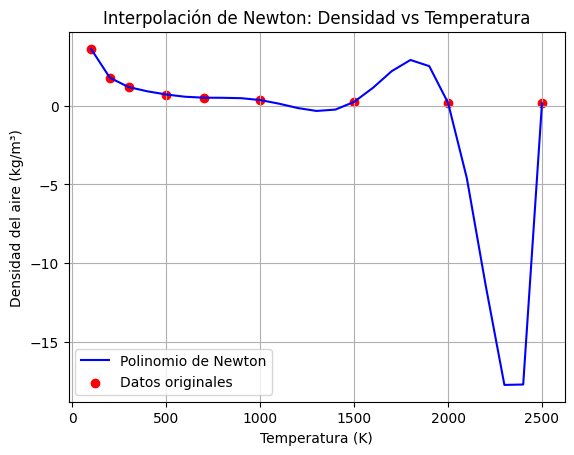

In [8]:
# Datos
T = np.array([100, 200, 300, 500, 700, 1000, 1500, 2000, 2500]) # en K
rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394]) # en kg/m^3

# Temperaturas dadas para estimar la densidad del aire
temperaturas = [250, 800, 3000]

# Evaluar con el polinomio de Newton
print("Estimaciones con el polinomio de Newton:")
for T_val in temperaturas:
    densidad = polinomio_newton(T, rho , T_val)
    print(f'densidad({T_val} K) = {densidad:.4f} kg/m³')


# Interpolación
T_interp = np.arange(100.0 , 2501.0 , 100)
rho_interp = polinomio_newton(T, rho, T_interp)

# Graficar
plt.plot(T_interp, rho_interp, label="Polinomio de Newton", color='blue')
plt.scatter(T, rho, color='red', label="Datos originales")

plt.xlabel("Temperatura (K)")
plt.ylabel("Densidad del aire (kg/m³)")
plt.title("Interpolación de Newton: Densidad vs Temperatura")
plt.grid(True)
plt.legend()
plt.show()

# 4.
Uno de los dispositivos más precisos para medir temperatura es el termómetro de resistencia de platino, también conocido como RTD. En este dispositivo, un alambre delgado y largo de platino se enrolla alrededor de un carrete y se encapsula en una cubierta de acero inoxidable. La resistencia del alambre cambia de manera muy lineal con la temperatura. Una longitud típica de alambre tiene una resistencia de aproximadamente 100 $\Omega$ a $0^{\circ}$ C y cambia alrededor de 0.39 $\Omega/^{\circ}$ C. Por lo tanto, para medir temperaturas con precisión, es necesario poder medir cambios en la resistencia con alta resolución. Tradicionalmente, se ha utilizado el circuito de puente desequilibrado para esto, como se ilustra en la figura, el cual proporciona un voltaje de salida pequeño que es proporcional (aunque no linealmente) a la resistencia del sensor.

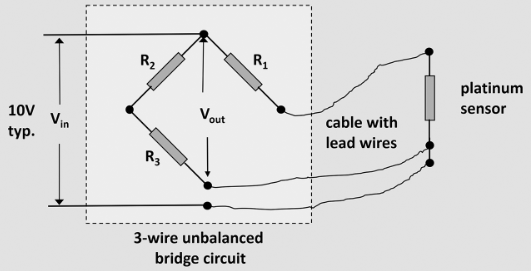




A continuación se presentan mediciones tomadas de dicho circuito, con $R_1 = R_2 = 5$ $k\Omega$ y $R_3 = 120$ $\Omega$:

```
resistencia = np.array([100, 115, 130, 145, 160, 175])  # Resistencia del sensor (Ohms)
voltaje = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])  # Salida del puente (V)
```

Un termómetro de resistencia de platino estándar de 100 $\Omega$ tiene una resistencia de 139.27 $\Omega$ a $100^\circ$ C. Utilice el método de interpolación que desee para estimar el voltaje de salida del puente en estas condiciones. Si la salida del puente se mide en 0 voltios, estime la resistencia medida. ¿Qué conclusión puede obtener?

In [4]:
# Datos
resistencia = np.array([100, 115, 130, 145, 160, 175])  # Resistencia del sensor (Ohms)
voltaje = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])  # Salida del puente (V)

# Interpolar resistencia vs voltaje
resistencia_interp = np.linspace(100 , 175 , 100)
voltaje_interp = CubicSpline(resistencia , voltaje , bc_type= 'natural')

# Voltaje de salida para una resistencia de 139.27 Ohms

vol_prediccion = voltaje_interp(139.27)

# Interpolar voltaje vs resistencia
vol_interp = np.linspace(-0.92896 , 0.45244 , 100)
resis_interp = CubicSpline(voltaje[::-1] , resistencia[::-1] , bc_type= 'natural')

# Resistencia si el voltaje fue de 0 voltios

resis_prediccion = resis_interp(0)

print(f'Si la resistencia = 139.27 Ohmss, entonces el voltaje = {vol_prediccion}')
print(f'Si el voltaje = 0 v, entones la resistencia = {resis_prediccion}')
print(f'Se puede apreciar que a menor resistencia, el voltaje aumenta')

Si la resistencia = 139.27 Ohmss, entonces el voltaje = -0.3699510277321739
Si el voltaje = 0 v, entones la resistencia = 119.97910699092803
Se puede apreciar que a menor resistencia, el voltaje aumenta


# 5.
El índice de refracción del vidrio de borosilicato a diferentes longitudes de onda se presenta en la siguiente tabla. Estime la longitud de onda donde el índice de refracción es 1.520.

```
lambda_angstrom = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])  # en Å
indice_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])
```

In [3]:
# Datos
lambda_angstrom = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])  # en Å
indice_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])

# Interpolar
indice_refraccion_interp = np.linspace(1.50883 , 1.52546 , 100)
lambda_angstrom_interp = CubicSpline(indice_refraccion , lambda_angstrom , bc_type= 'natural')

# Estimar la longitud de onda cuando el indice de refraccion es 1.520 Å
lambda_angstrom_estimacion = lambda_angstrom_interp(1.520)

print(f'Longitud de onda cuando el indice de refraccion es 1.520: {lambda_angstrom_estimacion} Å')

Longitud de onda cuando el indice de refraccion es 1.520: 4480.9640823086975 Å
